[To the anlysis >>>](#start)

In [451]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

## The Extraordinary Power of Explanatory Power

 **R-Squared** value.  This is a proportion (between 0 and 1) that expresses how much variance in the outcome variable our model was able to explain.  Higher $R^2$ values are better to a point-- a low $R^2$ indicates that our model isn't explaining much information about the outcome, which means it will not give very good predictions.  However, a very high $R^2$ is a warning sign for overfitting.  No dataset is a perfect representation of reality, so a model that perfectly fits our data ($R^2$ of 1 or close to 1) is likely to be biased by quirks in the data, and will perform less well on the test-set.



In [452]:
# Acquire, load, and preview the data.
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv', index_col=0)
display(data.head())

,TV,Radio,Newspaper,Sales
1,230.100,37.800,69.200,22.100
2,44.500,39.300,45.100,10.400
3,17.200,45.900,69.300,9.300
4,151.500,41.300,58.500,18.500
5,180.800,10.800,58.400,12.900


In [453]:


# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [2.93888937]

R-squared:
0.8972106381789521


## Assumptions of Multivariable Linear Regression

For regression to work its magic, inputs to the model need to be consistent with four assumptions:


### Assumption one: linear relationship

As mentioned earlier, features in a regression need to have a linear relationship with the outcome.  If the relationship is non-linear, the regression model will try to find any hint of a linear relationship, and only explain that – with predictable consequences for the validity of the model.

Sometimes this can be fixed by applying a non-linear transformation function to a feature.  For example, if the relationship between feature and outcome is quadratic and all feature scores are > 0, we can take the square root of the features, resulting in a linear relationship between the outcome and sqrt(feature).  


### Assumption two: multivariate normality

The error from the model (calculated by subtracting the model-predicted values from the real outcome values) should be normally distributed.  Since ordinary least squares regression models are fitted by choosing the parameters that best minimize error, skewness or outliers in the error can result in serious miss-estimations.

Outliers or skewness in error can often be traced back to outliers or skewness in data.  

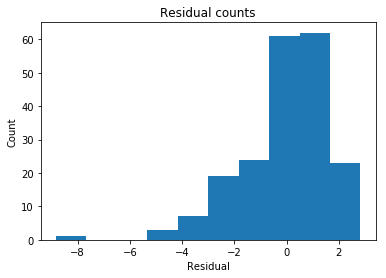

In [454]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()


### Assumption three: homoscedasticity

The distribution of your error terms (its "scedasticity"), should be consistent for all predicted values, or **homoscedastic**.

For example, if your error terms aren't consistently distributed and you have more variance in the error for large outcome values than for small ones, then the confidence interval for large predicted values will be too small because it will be based on the average error variance.  This leads to overconfidence in the accuracy of your model's predictions.

Some fixes to heteroscedasticity include transforming the dependent variable and adding features that target the poorly-estimated areas. For example, if a model tracks data over time and model error variance jumps in the September to November period, a binary feature indicating season may be enough to resolve the problem.

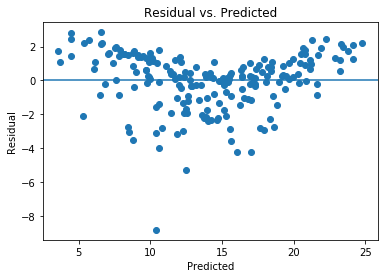

In [455]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

# Hm... looks a bit concerning.

### Assumption four: low multicollinearity

Correlations among features should be low or nonexistent.  When features are correlated, they may both explain the same pattern of variance in the outcome.  The model will attempt to find a solution, potentially by attributing half the explanatory power to one feature and half to the other.  This isn’t a problem if our only goal is prediction, because then all that matters is that the variance gets explained.  However, if we want to know which features matter most when predicting an outcome, multicollinearity can cause us to underestimate the relationship between features and outcomes.

Multicollinearity can be fixed by PCA or by discarding some of the correlated features.

In [456]:
correlation_matrix = X.corr()
display(correlation_matrix)

,TV,Radio,Newspaper
TV,1.000,0.055,0.057
Radio,0.055,1.000,0.354
Newspaper,0.057,0.354,1.000


## Drill: fixing assumptions <a class="anchor" id="start"></a>

Judging from the diagnostic plots, your data has a problem with both <u>heteroscedasticity</u> and <u>multivariate non-normality</u>.  Use the cell(s) below to see what you can do to fix it.

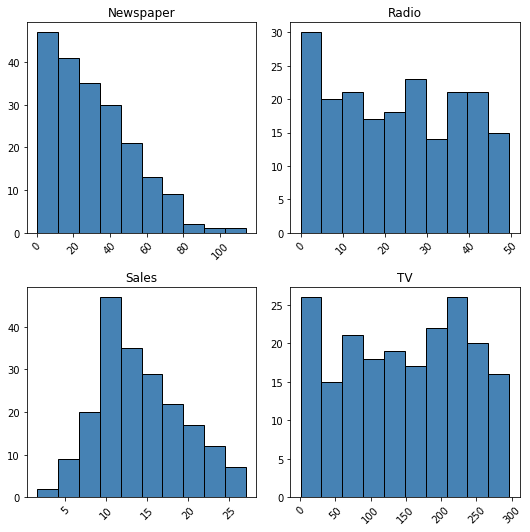

In [457]:
# Your code here.
# skewness or outliers

# Plot histograms to see what kind of distribution there is in each column:

fig = data.hist(bins=10,
                 color='steelblue',
                 edgecolor='black', linewidth=1.0,
                 xlabelsize=10, ylabelsize=10,
                 xrot=45, yrot=0,
                 figsize=(5,5),
                 grid=False)

plt.tight_layout(rect=(0, 0, 1.5, 1.5))  


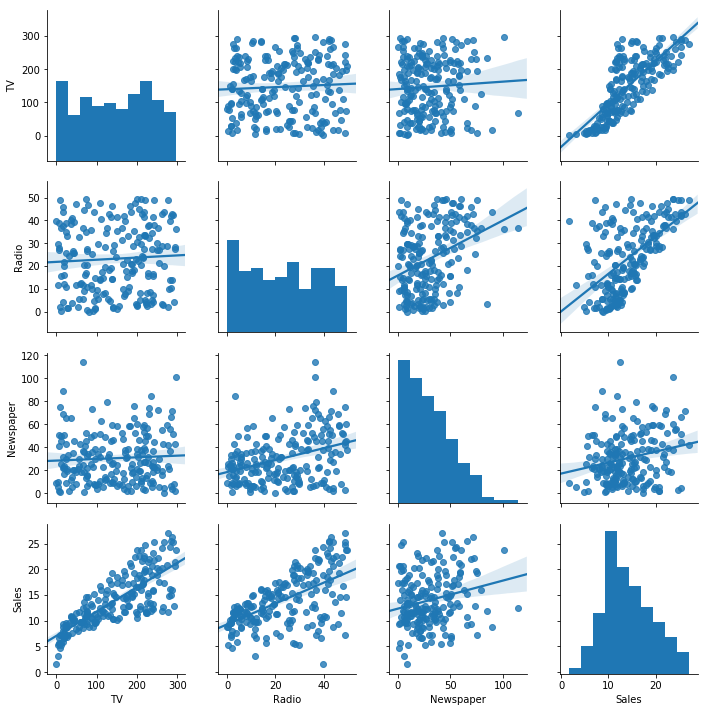

In [22]:
# or better this one:
g=sns.pairplot(data.fillna(0) , diag_kind='hist' , kind='reg' )
plt.show()

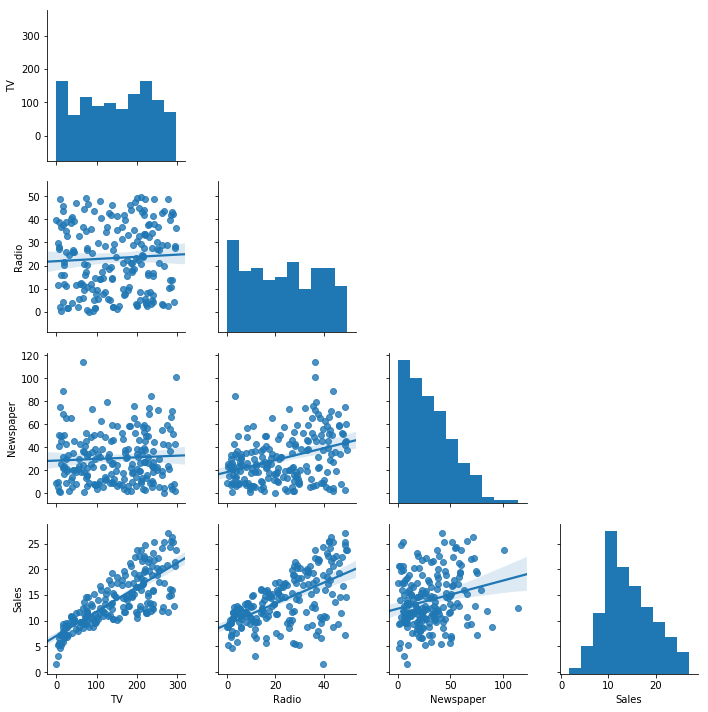

In [458]:
g = sns.pairplot(data.fillna(0) , diag_kind='hist' , kind='reg')
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

### Variable Linearization
Improving the correlation between a <u>dependent</u> variable and an <b>independent</b> variable is a big part of statistical modeling. The objectives of this type of transformation are 
> (1) to persuade the data to follow a straight line, and 

> (2) minimize the scatter of the data around the line. 



* TV(independent) vs Sales(dependent): there seems to be some linear relationship, but we could try to apply `ROOT` transformation(2,3...);
* Radio(independent) vs Sales(dependent): the linear relationship is too vague, but we could try `ROOT` again(2,3...);
* Newspaper(independent) vs Sales(dependent): nu linear relationship, try `LOG` as the independent variable is skewed to the right;

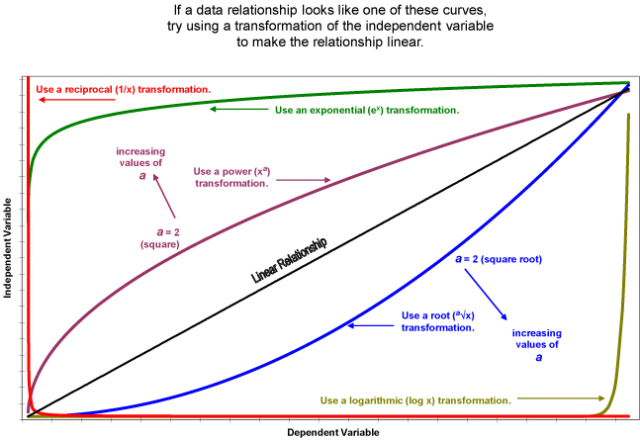

In [17]:
from IPython.display import Image
PATH = "/Users/desk-do/Documents/Python exercises for Data Science/Thinkful notebook/"
Image(filename = PATH + "independent-variable-transformations.jpg" #, width=100, height=100
     )

In [44]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [459]:
# Check if there are values <=0:
for i in data.columns:
    print(data[data['TV']<=0])

Empty DataFrame
Columns: [TV, Radio, Newspaper, Sales]
Index: []
Empty DataFrame
Columns: [TV, Radio, Newspaper, Sales]
Index: []
Empty DataFrame
Columns: [TV, Radio, Newspaper, Sales]
Index: []
Empty DataFrame
Columns: [TV, Radio, Newspaper, Sales]
Index: []


### Dependent Variable Transformations
After you’ve filled all the holes in your data matrix with sample adjustments, the next thing you should do is to make sure <u>the dependent variable approximates a Normal distribution</u>. If you haven’t looked at histograms and other indicators of Normality, always do that first. 

Then if your data distribution differs enough from the Normal distribution to make you nervous about your analysis, try a transformation of the dependent variable. Try several, in fact. Transformations of dependent variables create new variables but you’ll keep only one of the candidate dependent variables for an analysis. You want to pick the candidate dependent variable that fits a theoretical distribution best so that calculations of test probabilities are most accurate.

https://statswithcats.wordpress.com/2010/11/21/fifty-ways-to-fix-your-data/

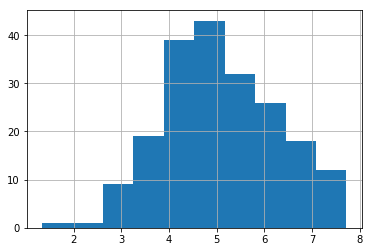

In [472]:
data_sales = np.power(data['Sales'],0.62)
data_sales.hist()

### Independent Variable Transformations
Once you have the dependent variable you want to work with, you can go on to examine all the relationships between that dependent variable and the independent variables. While the target for transforming a dependent variable is the Normal frequency distribution, the target for transforming independent variables is a straight-line correlation between the dependent variable and each independent variable. This can be a lot of work. Remember, you have to look at correlations and plots, perhaps even for special groupings of the data. That’s the reason you always start by finding a scale for the dependent variable that fits a Normal distribution. You wouldn’t want to repeat this process for more than one dependent variable if you didn’t have to.
https://statswithcats.wordpress.com/2010/11/21/fifty-ways-to-fix-your-data/

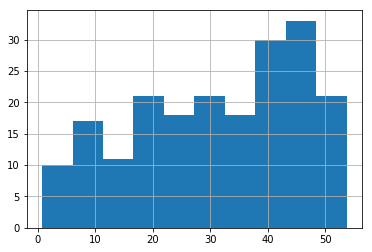

In [473]:
data_TV = np.power(data['TV'],0.7)
data_TV.hist()

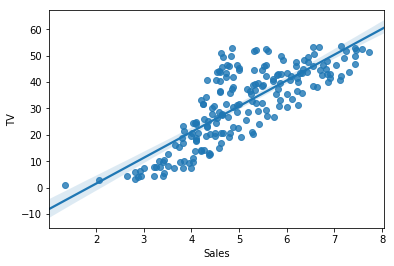

In [474]:
# Check if the TV transformation is in tune with the dependent variable!
sns.regplot( data_sales , data_TV  )
plt.show()

In [475]:
# In column 'Radio' replace one value of 'zero' with '0.01':
data.loc[128,'Radio'] = 0.1

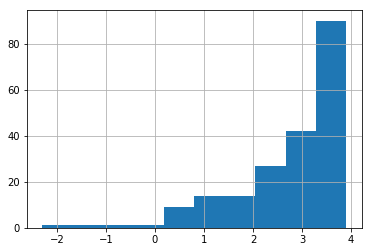

In [476]:
#data_radio = np.power(data['Radio'],0.5)
data_radio = np.log(data['Radio'])
data_radio.hist()
plt.show()

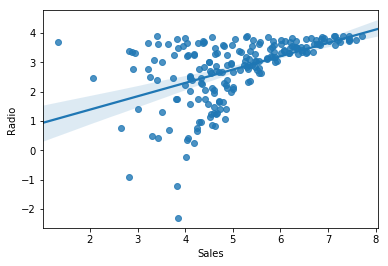

In [477]:
# Check if the Radio transformation is in tune with the dependent variable!
sns.regplot( data_sales , data_radio  )
plt.show()

In [478]:
data['Newspaper'].describe()

count   200.000
mean     30.554
std      21.779
min       0.300
25%      12.750
50%      25.750
75%      45.100
max     114.000
Name: Newspaper, dtype: float64

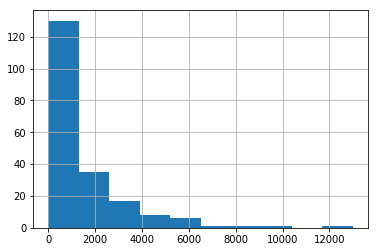

In [501]:
#data_news = np.log(data['Newspaper']  )
data_news = np.power(data['Newspaper'] , 2 )
data_news.hist()


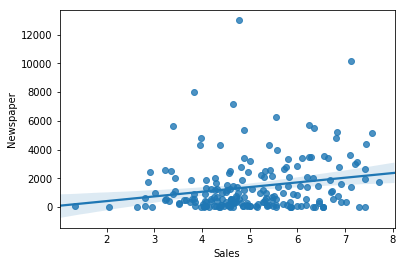

In [484]:
# Check if the Newspaper transformation is in tune with the dependent variable!
sns.regplot( data_sales , data_news  )
plt.show()

### The scipy.stats library provides an implementation of the Box-Cox transform. 
The boxcox() function takes an argument, called lambda, that controls the type of transform to perform.

Below are some common values for lambda

- lambda = -1. is a reciprocal transform.
- lambda = -0.5 is a reciprocal square root transform.
- lambda = 0.0 is a log transform.
- lambda = 0.5 is a square root transform.
- lambda = 1.0 is no transform.

In [486]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [487]:
from scipy.stats import boxcox
for i in data.columns:
    data_news2 = boxcox(data[i])
    print('boxcos %s = %f ' %(i , data_news2[1])
         )
#plt.hist(data_news[0])
#plt.show()

#plt.figure(1)
## line plot
#plt.subplot(211)
#plt.plot(data_news[0])
## histogram
#plt.subplot(212)
#plt.hist(data_news[0])



boxcos TV = 0.726645 
boxcos Radio = 0.612801 
boxcos Newspaper = 0.419643 
boxcos Sales = 0.577898 


In [489]:
features

,TV,Radio,Newspaper,Sales,TV_new,Radio_new,News_new,Sales_new
1,230.100,37.800,69.200,22.100,45.013,3.632,4788.640,6.816
2,44.500,39.300,45.100,10.400,14.251,3.671,2034.010,4.271
3,17.200,45.900,69.300,9.300,7.326,3.826,4802.490,3.985
4,151.500,41.300,58.500,18.500,33.596,3.721,3422.250,6.104
5,180.800,10.800,58.400,12.900,38.022,2.380,3410.560,4.882
6,8.700,48.900,75.000,7.200,4.546,3.890,5625.000,3.401
7,57.500,32.800,23.500,11.800,17.052,3.490,552.250,4.619
8,120.200,19.600,11.600,13.200,28.572,2.976,134.560,4.952
9,8.600,2.100,1.000,4.800,4.510,0.742,1.000,2.645
10,199.800,2.600,21.200,10.600,40.777,0.956,449.440,4.322


In [503]:
features = pd.concat((data , data_TV , data_radio , data_news ,data_sales ),axis=1)
features.columns.values[4] = "TV_new"
features.columns.values[5] = "Radio_new"
features.columns.values[6] = "News_new"
features.columns.values[7] = "Sales_new"


In [497]:
features.head()

,TV,Radio,Newspaper,Sales,TV_new,Radio_new,News_new,Sales_new
1,230.100,37.800,69.200,22.100,45.013,3.632,4788.640,6.816
2,44.500,39.300,45.100,10.400,14.251,3.671,2034.010,4.271
3,17.200,45.900,69.300,9.300,7.326,3.826,4802.490,3.985
4,151.500,41.300,58.500,18.500,33.596,3.721,3422.250,6.104
5,180.800,10.800,58.400,12.900,38.022,2.380,3410.560,4.882


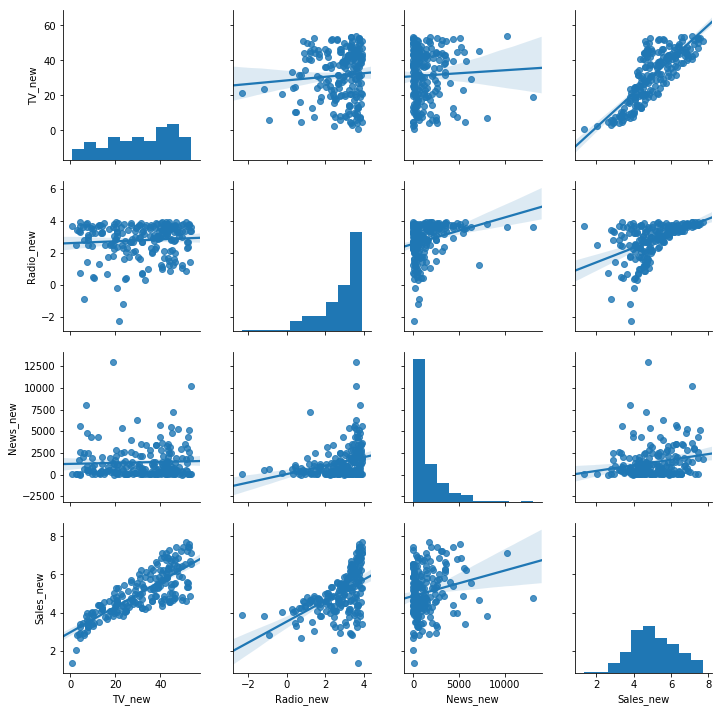

In [490]:
g = sns.pairplot(features[['TV_new' , 'Radio_new' , 'News_new' ,'Sales_new']].fillna(0) , diag_kind='hist' , kind='reg')
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(True)

###  StandardScaler or MinMaxScaler.

Also these scalers are good for normal data.

When we want to change the scale of a variable or standardize the values of a variable for better understanding. While this transformation is a must if you have data in different scales, this transformation <u>does not change the shape</u> of the variable distribution

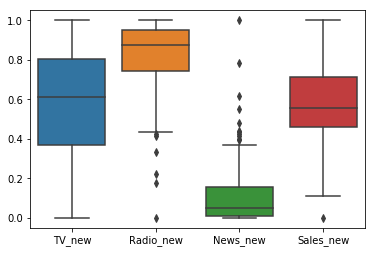

In [491]:
import pandas as pd
from sklearn.preprocessing import RobustScaler,StandardScaler,MinMaxScaler,quantile_transform
scaler = MinMaxScaler()

b_fit_scaled = scaler.fit_transform(features[['TV_new' , 'Radio_new' , 'News_new' ,'Sales_new']])

index = ['Row'+str(i) for i in range(1, len(b_fit_scaled)+1)]
df_fit_scaled = pd.DataFrame(b_fit_scaled, index=features[['TV_new' , 'Radio_new' , 'News_new' ,'Sales_new']].index 
                             , columns = features[['TV_new' , 'Radio_new' , 'News_new' ,'Sales_new']].columns )

sns.boxplot( data = df_fit_scaled )
plt.show()

In [492]:
df_fit_scaled.columns

Index(['TV_new', 'Radio_new', 'News_new', 'Sales_new'], dtype='object')

In [493]:


# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y_new = df_fit_scaled['Sales_new'].values.reshape(-1, 1)
X_new = df_fit_scaled[['TV_new','Radio_new','News_new']]
regr.fit(X_new, Y_new)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X_new, Y_new))


Coefficients: 
 [[0.53046633 0.45550693 0.06984537]]

Intercept: 
 [-0.10405831]

R-squared:
0.8488825357534604


* $R^2$ is lower than the initial one, but maybe the other `assumptions` are doing better:

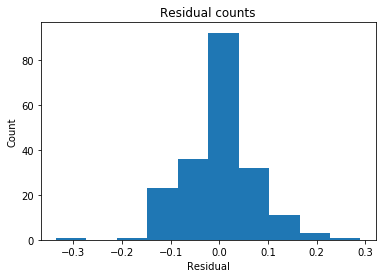

In [494]:
# Extract predicted values.
predicted = regr.predict(X_new).ravel()
actual = df_fit_scaled['Sales_new']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

* The residuals show a normal distribution, which is good!

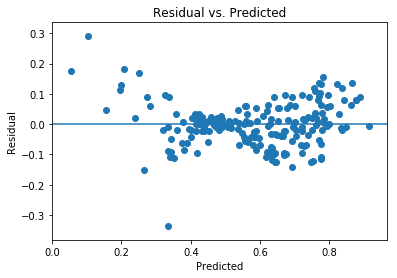

In [495]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

# Small improvement ... !?

In [496]:
correlation_matrix = X_new.corr()
display(correlation_matrix)

,TV_new,Radio_new,News_new
TV_new,1.000,0.077,0.044
Radio_new,0.077,1.000,0.285
News_new,0.044,0.285,1.000
